In [1]:
!pip install matplotlib
!pip install seaborn


In [2]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('DMart.csv')


In [3]:
df.head()
df.info()
df.shape
df.isna().sum()
df['Category'].fillna(df['Category'].mode()[0], inplace=True)
df['Quantity'].fillna(df['Quantity'].mode()[0], inplace=True)
df['Brand'].fillna(df['Brand'].mode()[0], inplace=True)
df['Price'].fillna(df['Price'].mode()[0], inplace=True)
df['DiscountedPrice'].fillna(df['DiscountedPrice'].mode()[0], inplace=True)
df['SubCategory'].fillna(df['SubCategory'].mode()[0], inplace=True)
df['Description'].fillna(df['Description'].mode()[0], inplace=True)
df['BreadCrumbs'].fillna(df['BreadCrumbs'].mode()[0], inplace=True)
df['Name'].fillna(df['Name'].mode()[0], inplace=True)
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5189 entries, 0 to 5188
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             5188 non-null   object 
 1   Brand            4789 non-null   object 
 2   Price            5188 non-null   float64
 3   DiscountedPrice  5188 non-null   float64
 4   Category         5186 non-null   object 
 5   SubCategory      5186 non-null   object 
 6   Quantity         5188 non-null   object 
 7   Description      5187 non-null   object 
 8   BreadCrumbs      5186 non-null   object 
dtypes: float64(2), object(7)
memory usage: 365.0+ KB
Name               0
Brand              0
Price              0
DiscountedPrice    0
Category           0
SubCategory        0
Quantity           0
Description        0
BreadCrumbs        0
dtype: int64


C:\Users\Niyati\AppData\Local\Temp\ipykernel_4356\386150518.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Category'].fillna(df['Category'].mode()[0], inplace=True)
C:\Users\Niyati\AppData\Local\Temp\ipykernel_4356\386150518.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [4]:
df['Category'].value_counts()

Category
Personal Care                    1237
Packaged Food                    1125
Home & Kitchen                    880
Grocery                           840
Dairy & Beverages                 429
Specials                          187
Clothing & Accessories             97
Fruits & Vegetables                78
School Supplies                    69
Appliances                         53
Beauty & Cosmetics                 46
Raincoat                           33
DMart Grocery                      31
Plant Container                    23
Tableware                          18
Backpacks                          13
Zebronics                           5
Motorbike Helmets                   4
Baby & Kids                         4
Geep                                3
Kitchen Aprons                      3
Butterfly                           2
Computer Accessories                2
Joyo Plastics                       2
Pigeon                              1
Syska                               1
Wat

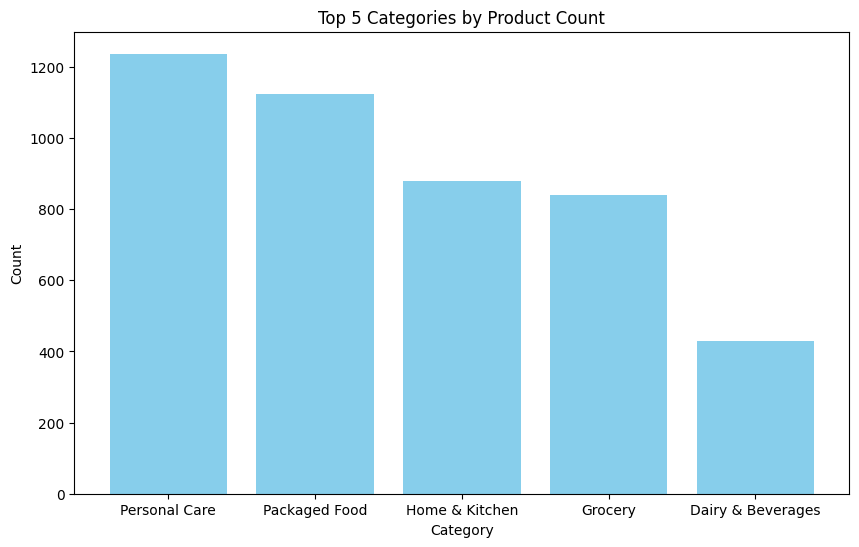

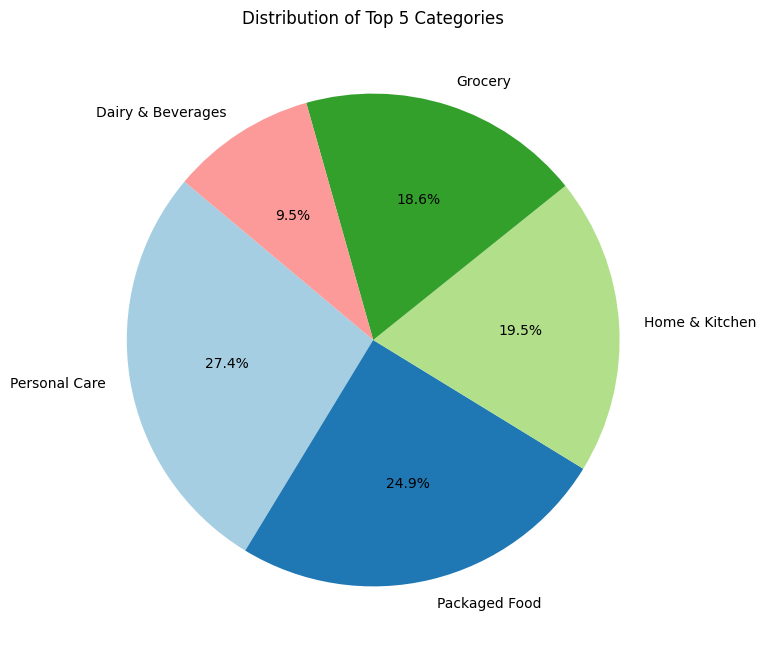

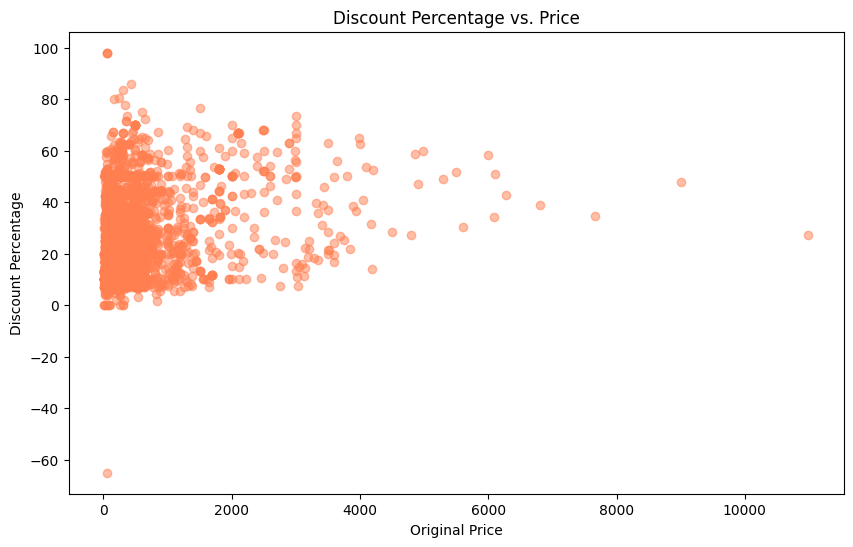

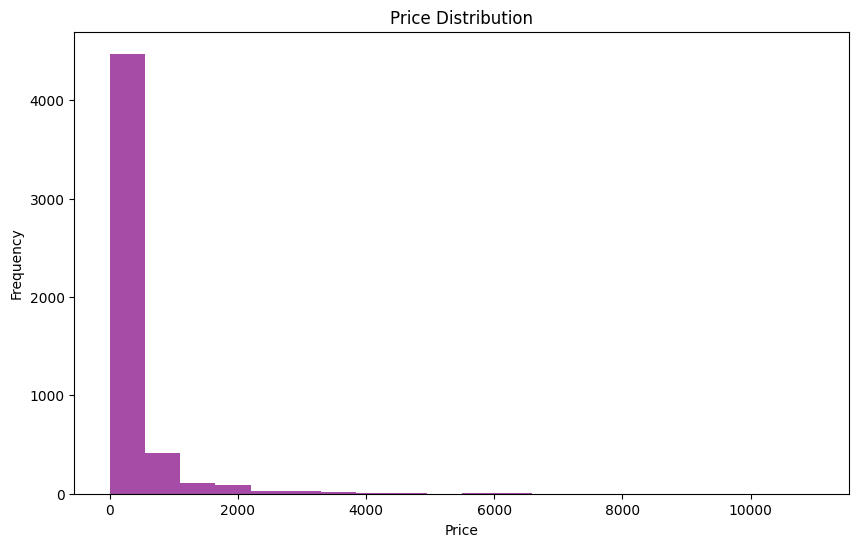

<Figure size 1200x600 with 0 Axes>

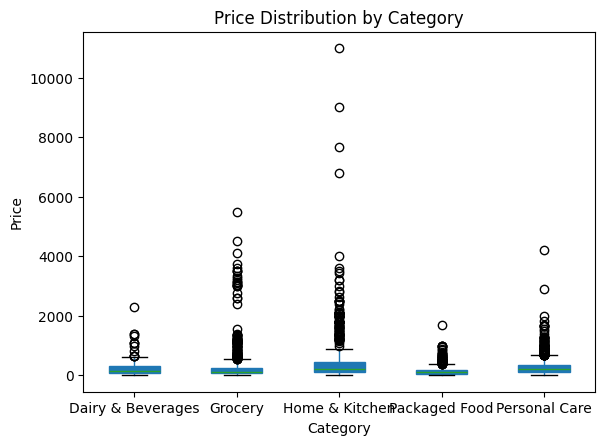

In [5]:
df['DiscountPercentage'] = ((df['Price'] - df['DiscountedPrice']) / df['Price']) * 100

# 1. Bar Chart: Top 5 Categories by Product Count
plt.figure(figsize=(10, 6))
top_categories = df['Category'].value_counts().head(5)
plt.bar(top_categories.index, top_categories.values, color='skyblue')
plt.title('Top 5 Categories by Product Count')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# 2. Pie Chart: Distribution of Categories
plt.figure(figsize=(8, 8))
category_counts = df['Category'].value_counts()
plt.pie(category_counts.head(5), labels=category_counts.index[:5], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Top 5 Categories')
plt.show()


# 4. Scatter Plot: Discount Percentage vs. Price
# Scatter plots are useful for identifying correlations, which is helpful in AI for feature engineering.
plt.figure(figsize=(10, 6))
plt.scatter(df['Price'], df['DiscountPercentage'], alpha=0.5, color='coral')
plt.title('Discount Percentage vs. Price')
plt.xlabel('Original Price')
plt.ylabel('Discount Percentage')
plt.show()

# 5. Histogram: Distribution of Prices
# Price distribution is important for outlier detection, useful in AI anomaly detection.
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=20, color='purple', alpha=0.7)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# 6. Box Plot: Price Distribution by Category
# Box plots help detect outliers, which is often crucial in preparing data for AI models.
plt.figure(figsize=(12, 6))
top_categories = df['Category'].value_counts().head(5).index
df_top_categories = df[df['Category'].isin(top_categories)]
df_top_categories.boxplot(column='Price', by='Category', grid=False, patch_artist=True)
plt.title('Price Distribution by Category')
plt.suptitle('')
plt.xlabel('Category')
plt.ylabel('Price')
plt.show()